## Experimental Boxing data review.ipynb

This notebook contains a review of the (thus far) collected boxing data. Here we inspect the data, perform preprocessing and conduct primary analysis and visualizations. </br>

Eight continuous data measurements were taken, (almost) all of them containing 300 seconds of data measuring up to 150 punches per dataset. Except for the control measurements which meant standing still and moving sligthly without throwing any punches. 

The following features were extrated from *Phyphox* app. 
- Rotation on the x-axis
- Rotation on the y-axis
- Rotation on the z-axis
- Acceleration on the x-axis
- Acceleration on the y-axis
- Acceleration on the z-axis
- Proximity (an experimental measurement which we shan't use)

We decided to exclude barometer as this measures air pressures in Pascal, which is not interesting in the cause of our experiment since we're collecting biometric data. 

![image.png](attachment:fe40c59d-a68b-431e-9f55-204343da9c7f.png)

</br>All Rotation and Acceleration datasets were collected at a sampling rate of **50Hz** (50Hz means that mobile device collects 50 datapoints per second). The decision was made due to the following reasons as the follows:
- Professional (right handed) boxers take 60-100ms to throw a jab; 150-200ms to throw a cross and other punches;
- Considering the fact that we are hobby-level boxers, it will take us (and other junior boxers) a slightly longer time to throw punches;
- This, we assume that it will take us approximately 250ms to throw a punch. Ideally, a sampling frequency of 250Hz shall be able to record a punching behavior whti a high temopral resolution (1ms/datapoint); however, this will result in millions of datapoints which is computationally expensive. Alternatively, we balance this by reducing the temporai resolution to 5ms/datapoint ->50Hz
- According to **Nyquist Shannon Sampling Theorem**, the sampling rate must be twice the analog bandwidth of the incoming signal to record a full-scale event including possible buffers (e.g.: few seconds to reposition your arm). We take twice of the 25Hz -> 50Hz.

In [37]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
# Change the filepath and dirpath accordingly to the location of datasets on your own device 
subject = "01"
run = "01"
# For naming convenience:
# lh -> Lead Hook
# rh -> Rear Hook
# lu -> Lead Uppercut
# ru -> Rear Uppercut
# acc -> Acceleration
# gyr -> Gyroscope (rotation)
# bar -> Barometer (pressure)
# pre -> preliminary

dirpath_left_nopunch = f"Data/Raw Data/Experimental/leftnopunch_sub-{subject}_run-{run}/"
dirpath_right_nopunch = f"Data/Raw Data/Experimental/rightnopunch_sub-{subject}_run-{run}/"
dirpath_jab = f"Data/Raw Data/Experimental/jab_sub-{subject}_run-{run}/"
dirpath_cross = f"Data/Raw Data/Experimental/cross_sub-{subject}_run-{run}/"
dirpath_lh = f"Data/Raw Data/Experimental/leadhook_sub-{subject}_run-{run}"
dirpath_rh = f"Data/Raw Data/Experimental/rearhook_sub-{subject}_run-{run}/"
dirpath_lu = f"Data/Raw Data/Experimental/leadupper_sub-{subject}_run-{run}/"
dirpath_ru = f"Data/Raw Data/Experimental/rearupper_sub-{subject}_run-{run}/"

dirpath_savefig = "Figures/Experimental Data/"

In [46]:
 # Left hand data without punch
left_nopunch_acc = pd.read_csv(os.path.join(dirpath_left_nopunch,"Linear Acceleration.csv"))
left_nopunch_gyr = pd.read_csv(os.path.join(dirpath_left_nopunch,"Gyroscope.csv"))

# Right hand data without punch
right_nopunch_acc = pd.read_csv(os.path.join(dirpath_right_nopunch,"Linear Acceleration.csv"))
right_nopunch_gyr = pd.read_csv(os.path.join(dirpath_right_nopunch,"Gyroscope.csv"))

# Jab data
jab_acc = pd.read_csv(os.path.join(dirpath_jab,"Linear Acceleration.csv"))
jab_gyr = pd.read_csv(os.path.join(dirpath_jab,"Gyroscope.csv"))

# Cross data
cross_acc = pd.read_csv(os.path.join(dirpath_cross,"Linear Acceleration.csv"))
cross_gyr = pd.read_csv(os.path.join(dirpath_cross,"Gyroscope.csv"))

# Lead Hook data
lefthook_acc = pd.read_csv(os.path.join(dirpath_lh,"Linear Acceleration.csv"))
lefthook_gyr = pd.read_csv(os.path.join(dirpath_lh,"Gyroscope.csv"))

# Rear Hook data
righthook_acc = pd.read_csv(os.path.join(dirpath_rh,"Linear Acceleration.csv"))
righthook_gyr = pd.read_csv(os.path.join(dirpath_rh,"Gyroscope.csv"))

# Lead Uppercut data
leftupper_acc = pd.read_csv(os.path.join(dirpath_lu,"Linear Acceleration.csv"))
leftupper_gyr = pd.read_csv(os.path.join(dirpath_lu,"Gyroscope.csv"))

# Rear Uppercut data
rightupper_acc = pd.read_csv(os.path.join(dirpath_ru,"Linear Acceleration.csv"))
rightupper_gyr = pd.read_csv(os.path.join(dirpath_ru,"Gyroscope.csv"))
    
# Changing colnames for consistency
acc_columns = {"Linear Acceleration x (m/s^2)" : "X (m/s^2)",
            "Linear Acceleration y (m/s^2)" : "Y (m/s^2)",
            "Linear Acceleration z (m/s^2)" : "Z (m/s^2)"
            }

gyr_columns = {"Gyroscope x (rad/s)" : "X (rad/s)",
            "Gyroscope y (rad/s)" : "Y (rad/s)",
            "Gyroscope z (rad/s)" : "Z (rad/s)"
            }

left_nopunch_acc.rename(columns=acc_columns, inplace=True)
left_nopunch_gyr.rename(columns=gyr_columns, inplace=True)

right_nopunch_acc.rename(columns=acc_columns, inplace=True)
right_nopunch_gyr.rename(columns=gyr_columns, inplace=True)

jab_acc.rename(columns=acc_columns, inplace=True)
jab_gyr.rename(columns=gyr_columns, inplace=True)

cross_acc.rename(columns=acc_columns, inplace=True)
cross_gyr.rename(columns=gyr_columns, inplace=True)

lefthook_acc.rename(columns=acc_columns, inplace=True)
lefthook_gyr.rename(columns=gyr_columns, inplace=True)

righthook_acc.rename(columns=acc_columns, inplace=True)
righthook_gyr.rename(columns=gyr_columns, inplace=True)

leftupper_acc.rename(columns=acc_columns, inplace=True)
leftupper_gyr.rename(columns=gyr_columns, inplace=True)

rightupper_acc.rename(columns=acc_columns, inplace=True)
rightupper_gyr.rename(columns=gyr_columns, inplace=True)
    
# Use dictionary to store dataframe for easier preprocessing
dict_sub_0101_data = {
    "left_nopunch_acc" : left_nopunch_acc,
    "left_nopunch_gyr" : left_nopunch_gyr,
    "jab_acc" : jab_acc,
    "jab_gyr" : jab_gyr,
    "cross_acc" : cross_acc,
    "cross_gyr" : cross_gyr,
    "leadhook_acc" : lefthook_acc,
    "leadhook_gyr" : lefthook_gyr,
    "rearhook_acc" : righthook_acc,
    "rearhook_gyr" : righthook_gyr,
    "leadupper_acc" : leftupper_acc,
    "leadupper_gyr" : leftupper_gyr,
    "rearupper_acc" : rightupper_acc,
    "rearupper_gyr" : rightupper_gyr
}


In [47]:
subject = "03"
run = "01"

dirpath_left_nopunch = f"Data/Raw Data/Experimental/leftnopunch_sub-{subject}_run-{run}/"
dirpath_right_nopunch = f"Data/Raw Data/Experimental/rightnopunch_sub-{subject}_run-{run}/"
dirpath_jab = f"Data/Raw Data/Experimental/jab_sub-{subject}_run-{run}/"
dirpath_cross = f"Data/Raw Data/Experimental/cross_sub-{subject}_run-{run}/"
dirpath_lh = f"Data/Raw Data/Experimental/leadhook_sub-{subject}_run-{run}"
dirpath_rh = f"Data/Raw Data/Experimental/rearhook_sub-{subject}_run-{run}/"
dirpath_lu = f"Data/Raw Data/Experimental/leaduppercut_sub-{subject}_run-{run}/"
dirpath_ru = f"Data/Raw Data/Experimental/rearuppercut_sub-{subject}_run-{run}/"

# Left hand data without punch
left_nopunch_acc = pd.read_csv(os.path.join(dirpath_left_nopunch,"Linear Accelerometer.csv"))
left_nopunch_gyr = pd.read_csv(os.path.join(dirpath_left_nopunch,"Gyroscope.csv"))

# Right hand data without punch
right_nopunch_acc = pd.read_csv(os.path.join(dirpath_right_nopunch,"Linear Accelerometer.csv"))
right_nopunch_gyr = pd.read_csv(os.path.join(dirpath_right_nopunch,"Gyroscope.csv"))

# Jab data
jab_acc = pd.read_csv(os.path.join(dirpath_jab,"Linear Accelerometer.csv"))
jab_gyr = pd.read_csv(os.path.join(dirpath_jab,"Gyroscope.csv"))

# Cross data
cross_acc = pd.read_csv(os.path.join(dirpath_cross,"Linear Accelerometer.csv"))
cross_gyr = pd.read_csv(os.path.join(dirpath_cross,"Gyroscope.csv"))

# Lead Hook data
leadhook_acc = pd.read_csv(os.path.join(dirpath_lh,"Linear Accelerometer.csv"))
leadhook_gyr = pd.read_csv(os.path.join(dirpath_lh,"Gyroscope.csv"))

# Rear Hook data
rearhook_acc = pd.read_csv(os.path.join(dirpath_rh,"Linear Accelerometer.csv"))
rearhook_gyr = pd.read_csv(os.path.join(dirpath_rh,"Gyroscope.csv"))

# Lead Uppercut data
leadupper_acc = pd.read_csv(os.path.join(dirpath_lu,"Linear Accelerometer.csv"))
leadupper_gyr = pd.read_csv(os.path.join(dirpath_lu,"Gyroscope.csv"))

# Rear Uppercut data
rearupper_acc = pd.read_csv(os.path.join(dirpath_ru,"Linear Accelerometer.csv"))
rearupper_gyr = pd.read_csv(os.path.join(dirpath_ru,"Gyroscope.csv"))

# Use dictionary to store dataframe for easier preprocessing
dict_sub_0301_data = {
    "left_nopunch_acc" : left_nopunch_acc,
    "left_nopunch_gyr" : left_nopunch_gyr,
    "jab_acc" : jab_acc,
    "jab_gyr" : jab_gyr,
    "cross_acc" : cross_acc,
    "cross_gyr" : cross_gyr,
    "leadhook_acc" : lefthook_acc,
    "leadhook_gyr" : lefthook_gyr,
    "rearhook_acc" : righthook_acc,
    "rearhook_gyr" : righthook_gyr,
    "leadupper_acc" : leftupper_acc,
    "leadupper_gyr" : leftupper_gyr,
    "rearupper_acc" : rightupper_acc,
    "rearupper_gyr" : rightupper_gyr
}

## 1. Quick Inspection of Raw Data

In [50]:
jab_acc

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.069918,-0.828782,-0.202890,-0.122719
1,0.089800,-0.536640,-0.309360,0.009911
2,0.109685,-0.366417,-0.256942,-0.051787
3,0.129602,-0.154796,-0.186984,-0.120690
4,0.149470,-0.058973,-0.196596,-0.179481
...,...,...,...,...
15079,299.997001,2.166874,8.574938,6.054503
15080,300.016878,2.219635,8.002416,6.136904
15081,300.036790,1.286067,7.608963,3.569860
15082,300.056665,1.067307,6.728621,1.599188


In [51]:
jab_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.069918,-0.326094,-0.113847,0.045139
1,0.089800,-0.276561,-0.312646,0.023302
2,0.109685,-0.224831,-0.395801,0.013715
3,0.129602,-0.172102,-0.385681,0.006791
4,0.149470,-0.127295,-0.320103,0.005726
...,...,...,...,...
15080,300.016878,1.413631,0.170238,-0.034753
15081,300.036790,0.964835,1.143994,-0.283152
15082,300.056665,0.596530,1.458504,-0.358850
15083,300.076569,0.269770,1.392925,-0.249597


In [52]:
left_nopunch_acc

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.056823,-0.289389,0.134704,-0.547034
1,0.076758,-0.005771,0.138859,-0.525477
2,0.096604,0.277815,0.118115,-0.425069
3,0.116495,0.430300,-0.044129,-0.446750
4,0.136389,0.429491,-0.015016,-0.375154
...,...,...,...,...
15078,299.983567,0.691936,-0.704811,-1.188069
15079,300.003448,0.505109,-0.834506,-1.007961
15080,300.023374,0.372775,-0.840040,-0.806239
15081,300.043249,0.416613,-0.890777,-0.742727


In [53]:
left_nopunch_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.056823,-0.177228,-0.394336,-0.215577
1,0.076758,-0.166043,-0.347399,-0.112182
2,0.096604,-0.149532,-0.259517,-0.039147
3,0.116495,-0.139945,-0.123034,0.006724
4,0.136389,-0.119706,0.004328,0.033355
...,...,...,...,...
15079,300.003448,0.089746,-0.007390,-0.067376
15080,300.023374,0.146802,-0.006857,0.004061
15081,300.043249,0.199598,-0.032423,0.079160
15082,300.063145,0.257121,-0.055326,0.151663


In [55]:
print(lefthook_acc["X (m/s^2)"].max())
print(lefthook_acc["X (m/s^2)"].min())

print(righthook_acc["Y (m/s^2)"].max())
print(righthook_acc["Y (m/s^2)"].min())

print(left_nopunch_acc["Z (m/s^2)"].max())
print(left_nopunch_acc["Z (m/s^2)"].min())

65.24395752
-41.12570572
76.10261536
-73.42828369
2.540532589
-2.566509485


In [48]:
# Statistical summary of raw data 
for exp_data in dict_sub_0301.keys():
    print(f"{exp_data}:")
    print(dict_sub0301[exp_data].describe())

left_nopunch_acc:
           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  15083.000000  15083.000000  15083.000000  15083.000000
mean     150.058696      0.000772      0.027398     -0.034148
std       86.613020      0.444974      0.517356      0.592057
min        0.056823     -2.931043     -2.191932     -2.566509
25%       75.056861     -0.238612     -0.262952     -0.447937
50%      150.058146      0.000859     -0.005801     -0.041387
75%      225.060159      0.221248      0.283765      0.344892
max      300.063145      3.040626      2.896368      2.540533
left_nopunch_gyr:
           Time (s)     X (rad/s)     Y (rad/s)     Z (rad/s)
count  15084.000000  15084.000000  15084.000000  15084.000000
mean     150.068641     -0.000093      0.003392     -0.001698
std       86.618762      0.287780      0.284269      0.231878
min        0.056823     -1.103581     -1.464096     -1.156310
25%       75.061836     -0.175630     -0.138480     -0.104193
50%      150.068076     -0.005126 

In [49]:
dict_sub0301_no_time = dict()

for data in dict_sub_0301_data.keys():
    no_time_key = data + "_noTime"
    no_time_df = dict_sub_0101_data[data].drop('Time (s)', axis=1)
    dict_sub0301_no_time.setdefault(no_time_key, no_time_df)

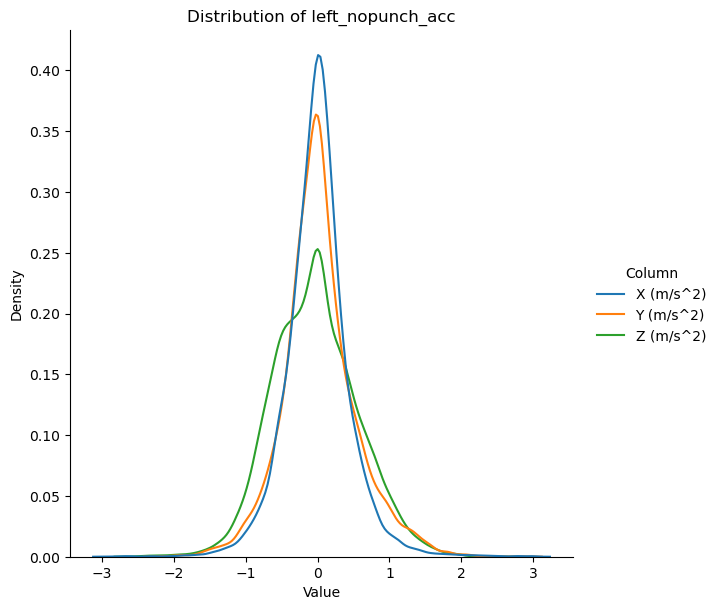

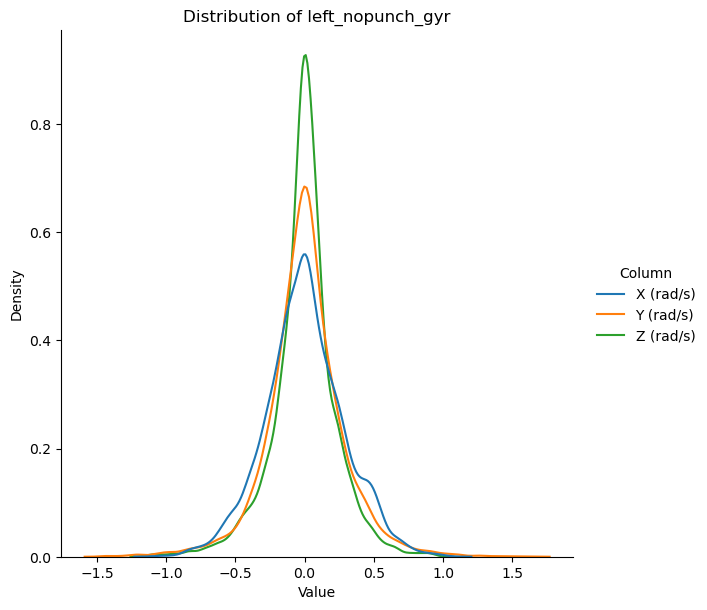

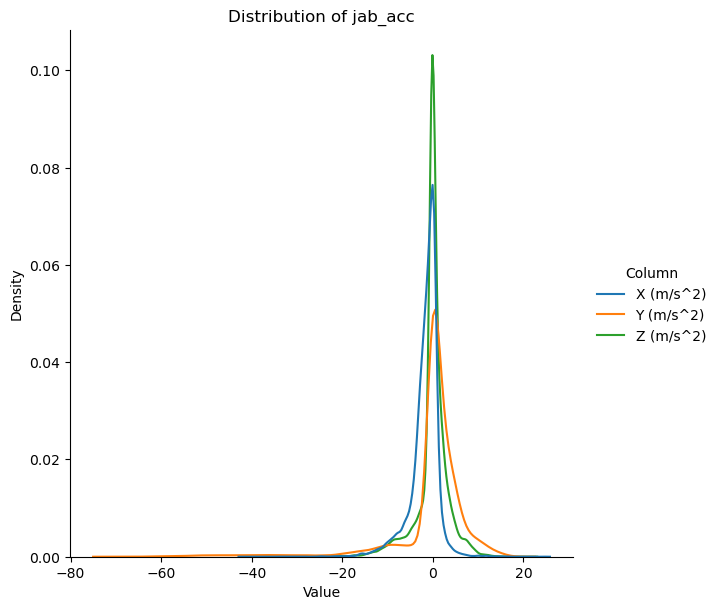

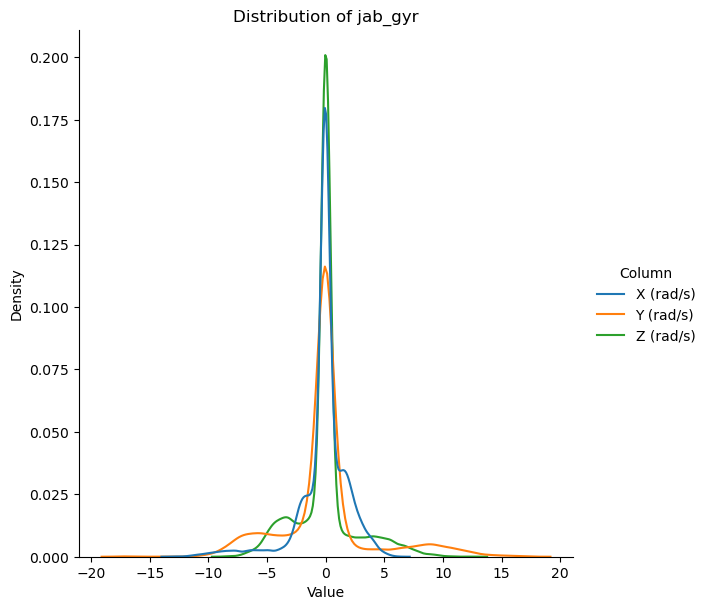

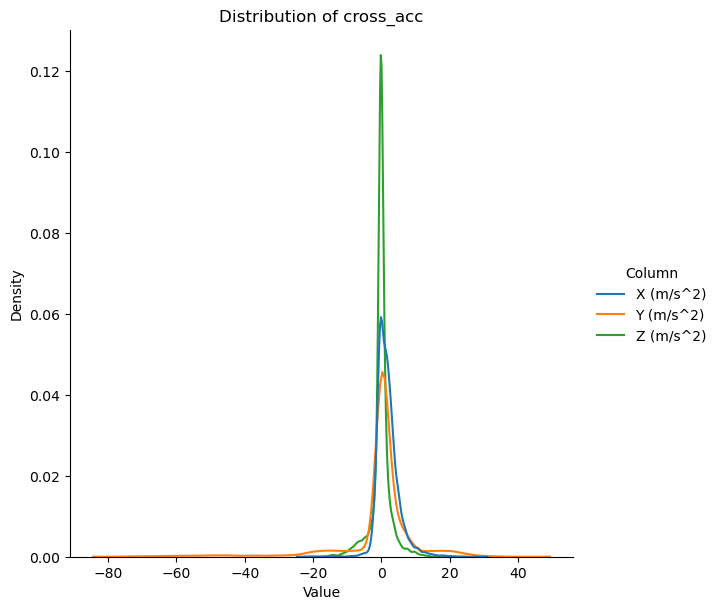

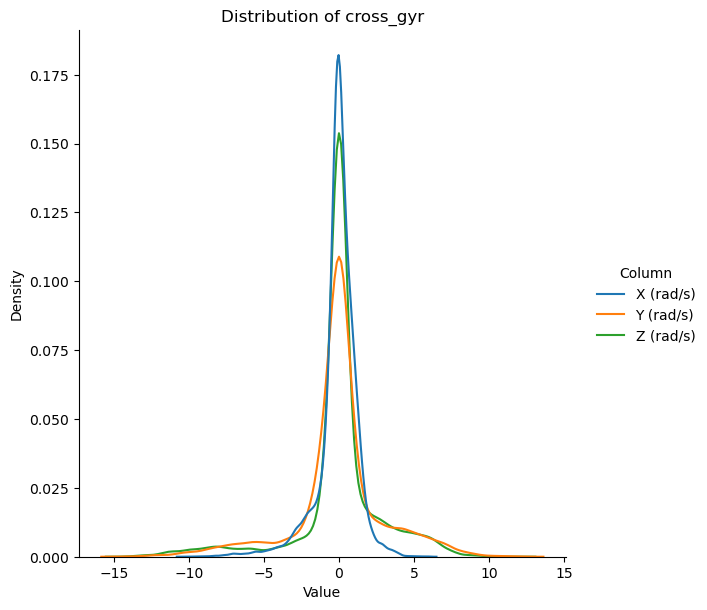

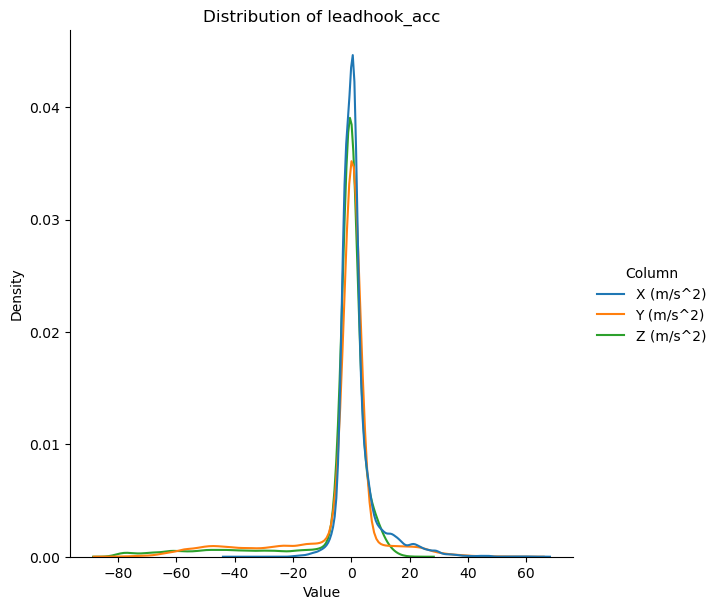

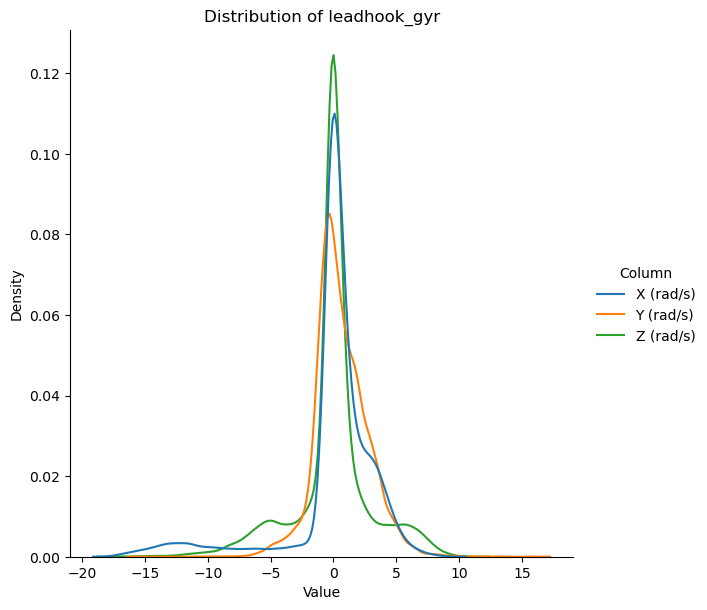

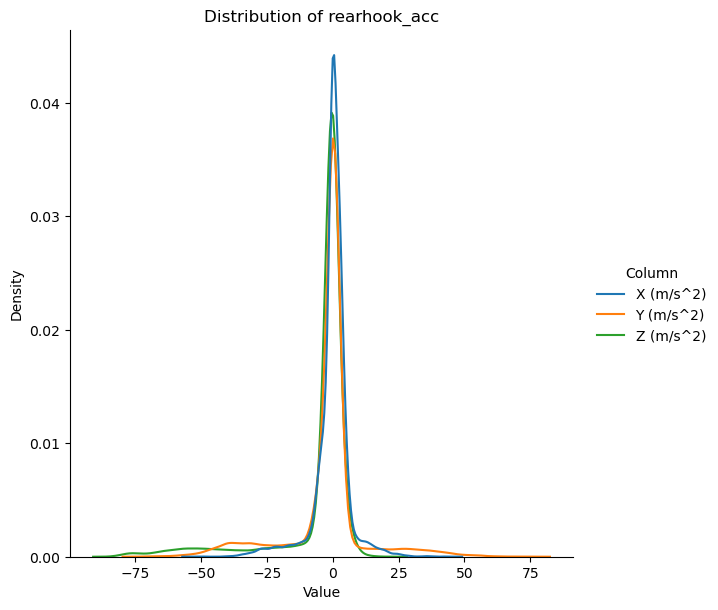

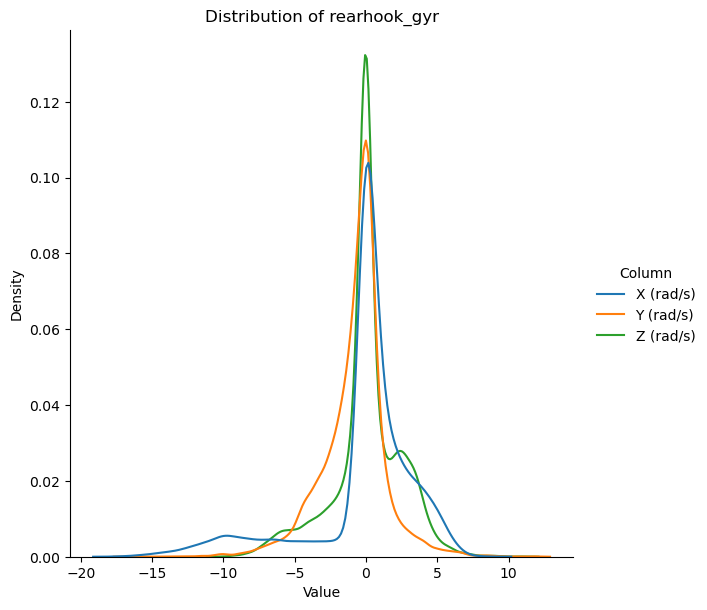

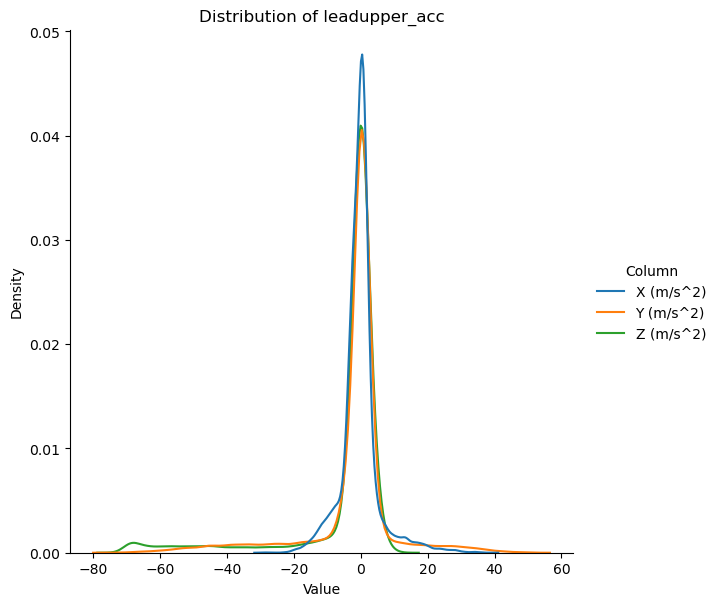

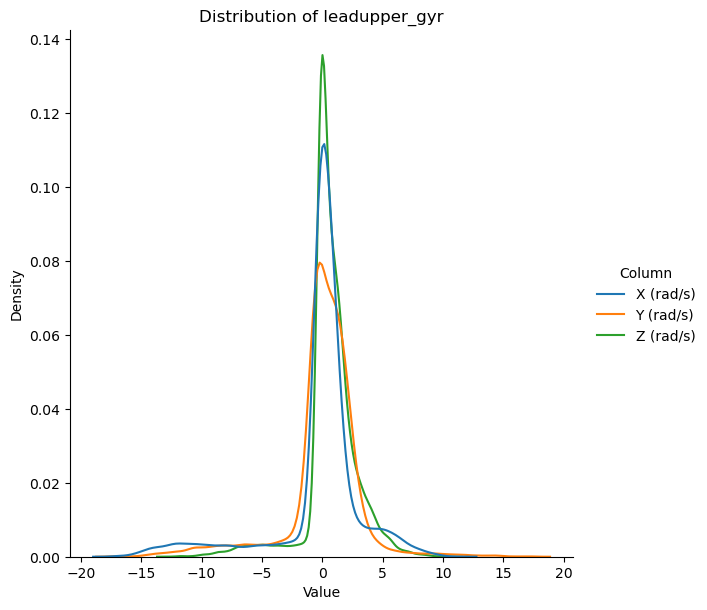

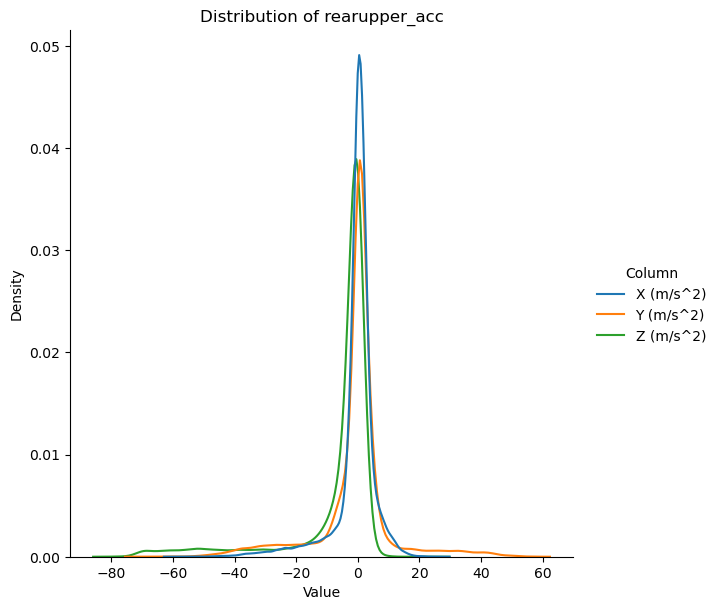

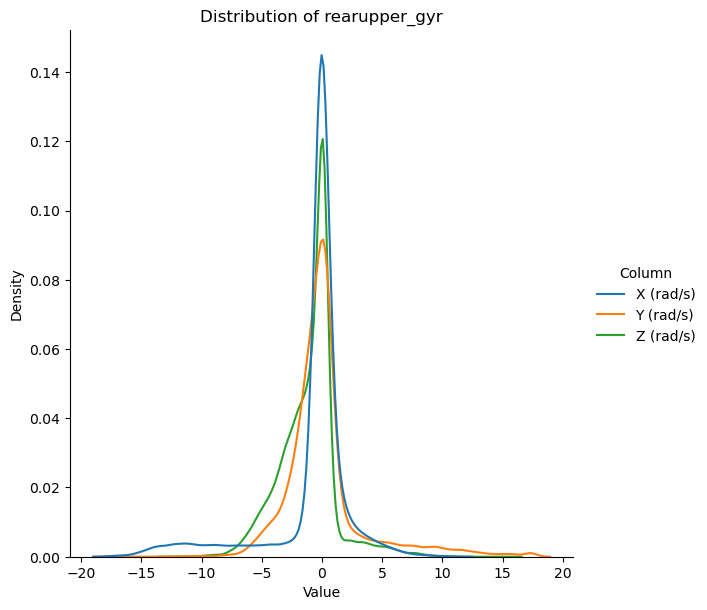

In [50]:
# Plot the distributions
for data in dict_sub0301_no_time.keys():
    df_melted = dict_sub0301_no_time[data].melt(var_name='Column', value_name='Value')

    sns.displot(df_melted, x='Value', hue='Column', kind='kde', height=6, aspect=1)
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Distribution of {data.replace("_noTime", "")}')
    plt.show()

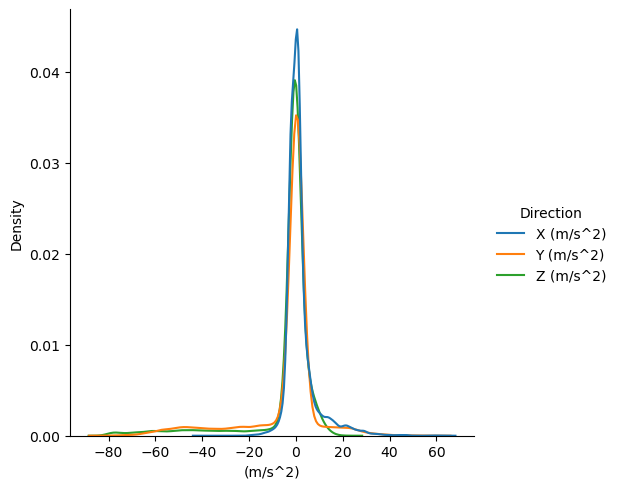

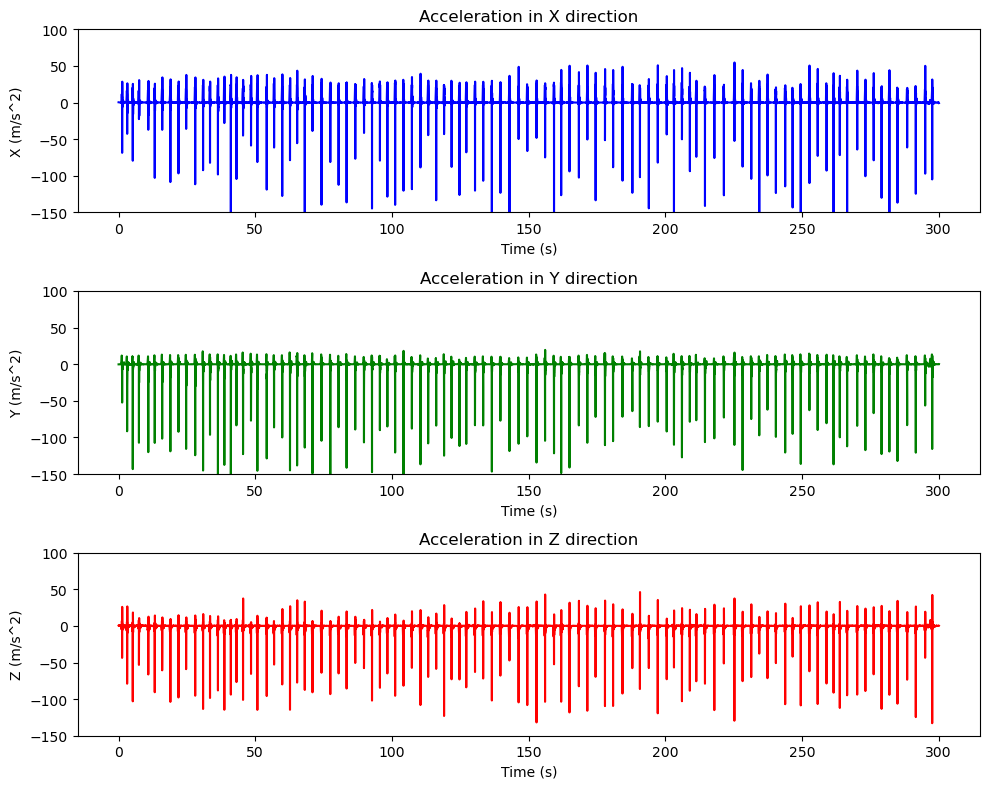

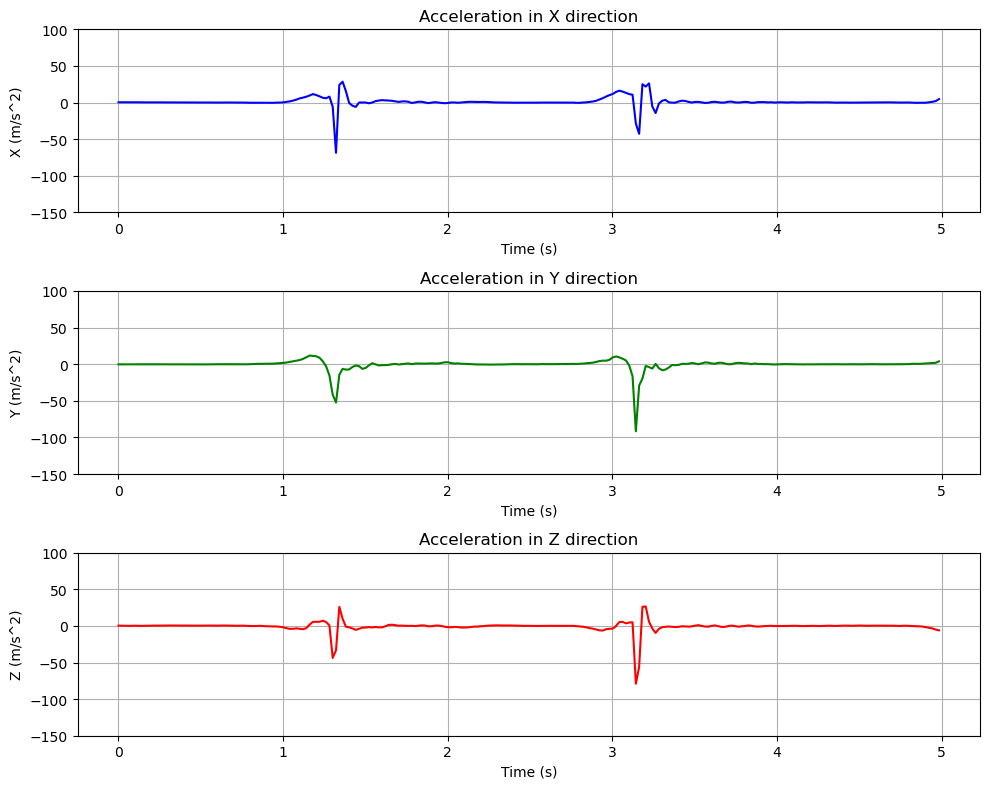

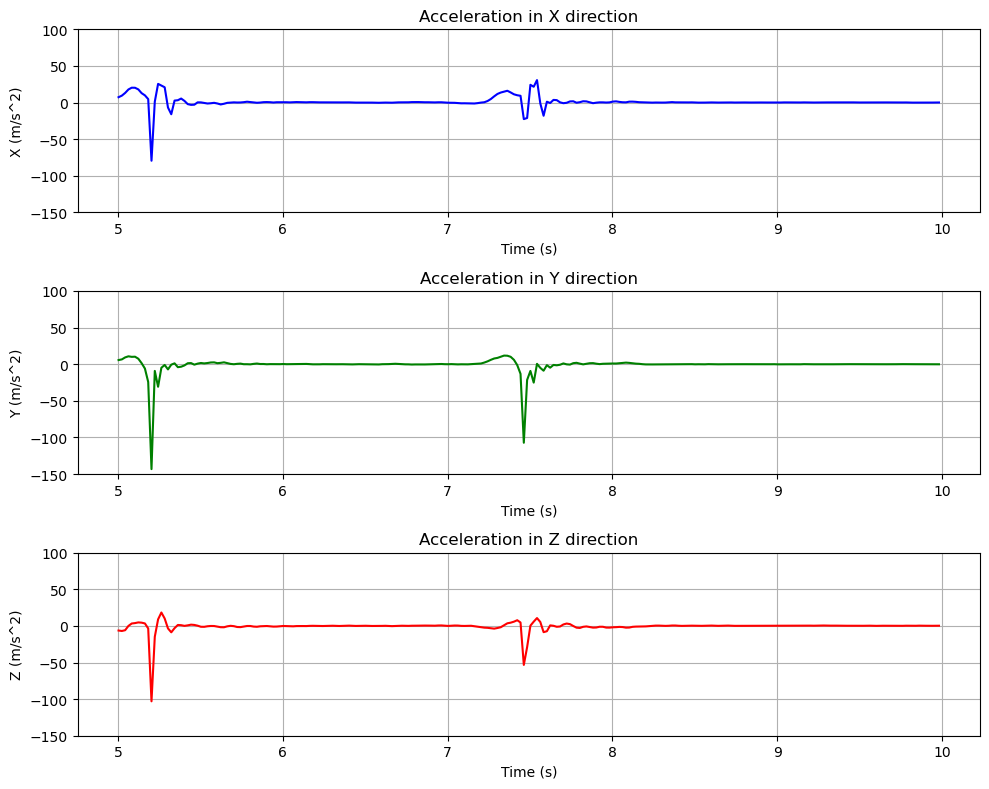

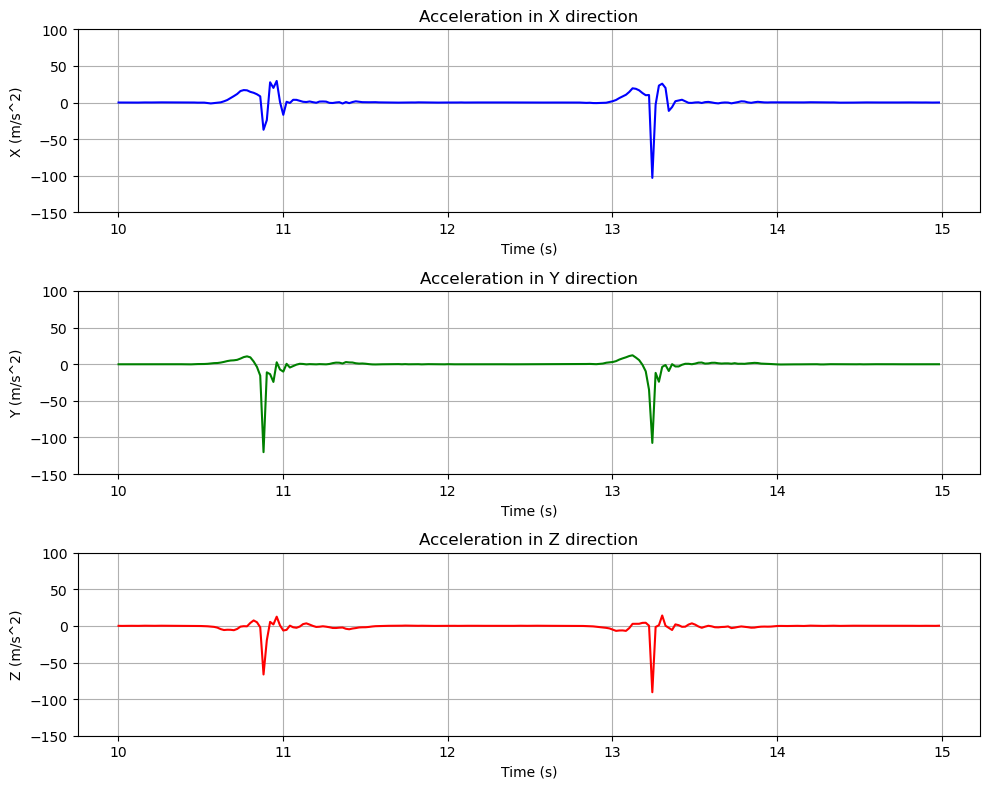

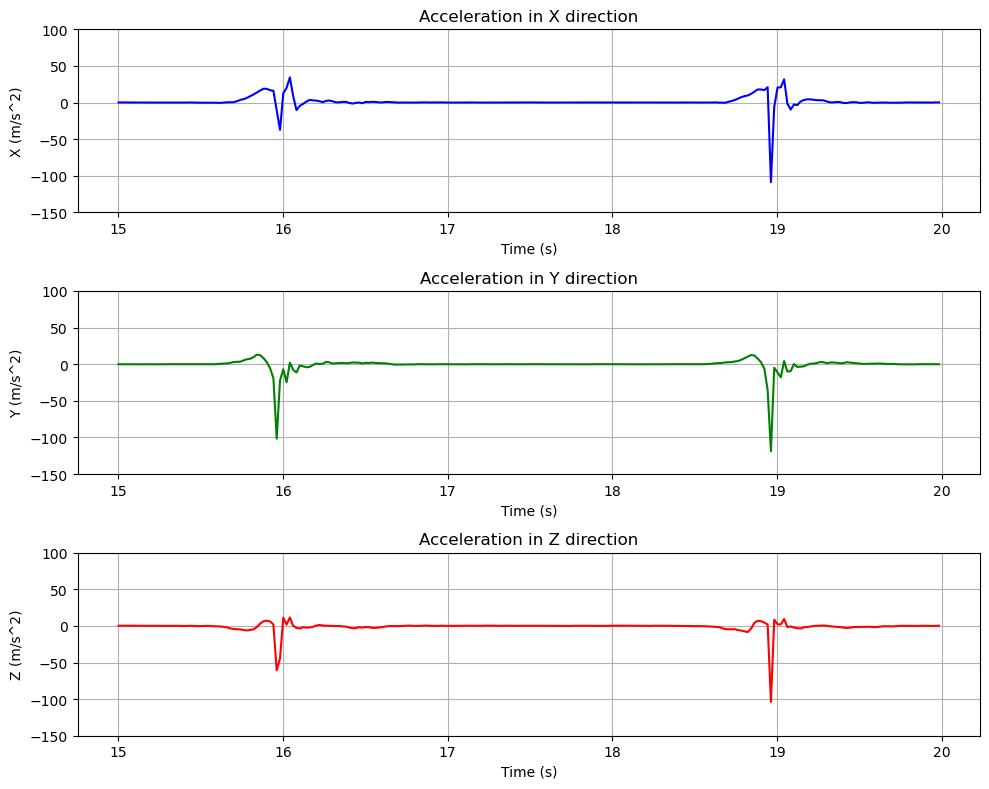

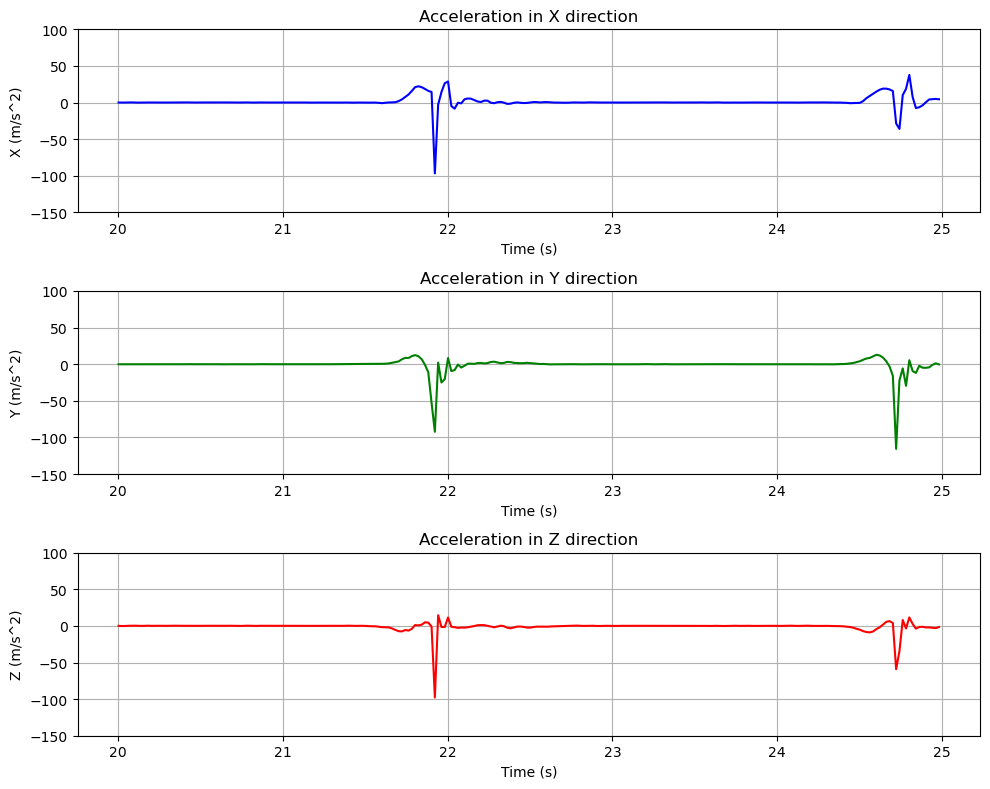

In [31]:
# Look at acceleration per second for 5 seconds
# The jab
# Plot for X (m/s^2)

df_melted = dict_sub0301_no_time["lefthook_acc_noTime"].melt(var_name="Direction", value_name="(m/s^2)")
sns.displot(df_melted, x="(m/s^2)", hue="Direction", kind="kde")

x = jab_acc["Time (s)"]
y_x = jab_acc["X (m/s^2)"]
y_y = jab_acc["Y (m/s^2)"]
y_z = jab_acc["Z (m/s^2)"]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot for X (m/s^2)
axs[0].plot(x, y_x, color='b')
axs[0].set_title('Acceleration in X direction')
axs[0].set_ylim(-150,100)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('X (m/s^2)')

# Plot for Y (m/s^2)
axs[1].plot(x, y_y, color='g')
axs[1].set_title('Acceleration in Y direction')
axs[1].set_ylim(-150,100)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Y (m/s^2)')

# Plot for Z (m/s^2)
axs[2].plot(x, y_z, color='r')
axs[2].set_title('Acceleration in Z direction')
axs[2].set_ylim(-150,100)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Z (m/s^2)')

plt.tight_layout()

# plt.savefig(os.path.join("Series of Acceleration of Jab"))
plt.show()

for second in range(0,5):
    start = second * 250
    end = (second + 1) * 250
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    
    axs[0].plot(x[start:end], y_x[start:end], color='b')
    axs[0].set_title('Acceleration in X direction')
    axs[0].set_ylim(-150,100)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('X (m/s^2)')
    axs[0].grid(True)

    # Plot for Y (m/s^2)
    axs[1].plot(x[start:end], y_y[start:end], color='g')
    axs[1].set_title('Acceleration in Y direction')
    axs[1].set_ylim(-150,100)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Y (m/s^2)')
    axs[1].grid(True)

    # Plot for Z (m/s^2)
    axs[2].plot(x[start:end], y_z[start:end], color='r')
    axs[2].set_title('Acceleration in Z direction')
    axs[2].set_ylim(-150,100)
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Z (m/s^2)')
    axs[2].grid(True)

    plt.tight_layout()
    # plt.savefig(os.path.join(dirpath_savefig, f"Series of Acceleration of Jab in second {second + 1}"))
    plt.show()

## 2.1 Data Aggregation

In [51]:
def aggregate_data(df):

    """
    returns an aggregated dataframe on a window of 50 datapoints. Discard the remainders that have less than 50 datapoints.
    :param df: The Raw Data
    :returns df_agg: A dataframe with features aggregated.
    """

    # Make a copy of the original df, remove the remaining window that are less than 50 (this can happen due to the device)
    len_df = len(df) // 50 * 50
    df_copy = df[:len_df].copy()
    df_colnames = df_copy.columns

    # Make a template of aggregated df
    df_agg = {
        df_colnames[0]: [],
        df_colnames[1]: [],
        df_colnames[2]: [],        
    }
        
    i = 0
    j = 50

    # Calculate the mean of absolute values of each window (every 50 datapoints)
    # All mean values will be rounded to 3 decimals
    while j <= len_df:
        df_window = df_copy[i:j]
        agg_values = []
        
        for col in df_window:
            agg_values.append(df_window[col].abs().mean())

        df_agg[df_colnames[0]].append(agg_values[0].round(3))
        df_agg[df_colnames[1]].append(agg_values[1].round(3))
        df_agg[df_colnames[2]].append(agg_values[2].round(3))
            
            
        i += 50
        j += 50

    # Convert aggregated values into a dataframe
    df_agg = pd.DataFrame(df_agg)

    return df_agg

In [59]:
sub03_jab_df = aggregate_data(dict_sub0301_no_time["jab_acc_noTime"])
sub03_jab_df

,X (m/s^2),Y (m/s^2),Z (m/s^2)
0,2.172,4.001,1.749
1,1.685,2.410,1.840
2,0.426,0.244,0.255
3,4.009,6.656,2.856
4,0.274,0.153,0.155
...,...,...,...
296,1.923,3.032,2.153
297,3.235,7.443,2.634
298,1.752,2.692,1.865
299,2.849,6.645,2.030


In [69]:
# Convert all dataframe except the barometer

dict_sub03_agg = dict()

for data in dict_sub0301_no_time.keys():
    
    if "_bar_" not in data:
        key_data = data.replace("_noTime","_agg")
        value_data = aggregate_data(dict_sub0301_no_time[data])
        dict_sub03_agg.setdefault(key_data, value_data)
        
    else:
        dict_sub03_agg.setdefault(data.replace("_noTime", "_agg"), dict_sub0301_no_time[data])


dict_sub03_agg

{'left_nopunch_acc_agg':      X (m/s^2)  Y (m/s^2)  Z (m/s^2)
 0        0.651      0.846      0.437
 1        0.622      0.858      0.649
 2        0.594      1.014      0.381
 3        0.463      0.801      0.318
 4        0.465      0.636      0.244
 ..         ...        ...        ...
 296      0.464      0.300      0.372
 297      0.799      0.788      0.490
 298      0.393      0.997      0.777
 299      0.585      0.408      0.680
 300      0.769      0.734      0.575
 
 [301 rows x 3 columns],
 'left_nopunch_gyr_agg':      X (rad/s)  Y (rad/s)  Z (rad/s)
 0        0.238      0.614      0.127
 1        0.213      0.193      0.206
 2        0.266      0.237      0.148
 3        0.286      0.203      0.113
 4        0.286      0.249      0.208
 ..         ...        ...        ...
 296      0.455      0.277      0.418
 297      0.407      0.289      0.242
 298      0.203      0.135      0.153
 299      0.159      0.274      0.089
 300      0.168      0.178      0.160
 
 [301 rows 

In [87]:
print(dict_sub03_agg)

{'left_nopunch_acc_agg':      X (m/s^2)  Y (m/s^2)  Z (m/s^2)
0        0.651      0.846      0.437
1        0.622      0.858      0.649
2        0.594      1.014      0.381
3        0.463      0.801      0.318
4        0.465      0.636      0.244
..         ...        ...        ...
296      0.464      0.300      0.372
297      0.799      0.788      0.490
298      0.393      0.997      0.777
299      0.585      0.408      0.680
300      0.769      0.734      0.575

[301 rows x 3 columns], 'left_nopunch_gyr_agg':      X (rad/s)  Y (rad/s)  Z (rad/s)
0        0.238      0.614      0.127
1        0.213      0.193      0.206
2        0.266      0.237      0.148
3        0.286      0.203      0.113
4        0.286      0.249      0.208
..         ...        ...        ...
296      0.455      0.277      0.418
297      0.407      0.289      0.242
298      0.203      0.135      0.153
299      0.159      0.274      0.089
300      0.168      0.178      0.160

[301 rows x 3 columns], 'jab_acc_agg'

## 2.2 Data Transformation and Labeling 

In [75]:
# Concatinate the features to the same punch type

dict_transformed_data= dict()
punch_types = ['left_nopunch', 'right_nopunch','jab','cross', 'leadhook', 'rearhook', 'leadupper','rearupper']

i = 0
j = 3
idx_punch_types = 0
while j <= 24:
    concat_df = pd.concat([df for df in [feature_df for feature_df in dict_sub03_agg.values()][i:j]], axis=1)
    dict_transformed_data.setdefault("transformed_" + punch_types[idx_punch_types], concat_df)
    i += 3
    j += 3
    idx_punch_types += 1

dict_transformed_data

ValueError: No objects to concatenate

In [58]:
dict_transformed_data["transformed_jab"].head()

,Time (s),X (m/s^2),Y (m/s^2),Time (s),X (rad/s),Y (rad/s),Time (s),X (m/s^2),Y (m/s^2)
0,0.508,3.172,2.219,0.528,0.743,1.582,0.533,6.082,11.275
1,1.503,4.981,13.393,1.523,3.123,1.779,1.527,2.984,4.833
2,2.497,4.586,8.017,2.517,1.364,2.273,2.522,6.707,15.264
3,3.492,2.204,7.133,3.512,1.241,1.032,3.516,1.271,0.338
4,4.487,5.647,11.289,4.506,1.689,2.633,4.511,4.595,14.627


In [ ]:
# label the data 
# There are missing values in Barometers due to the measurement limitation. We firstly try to fill them in by mean

def dataframe_labeller(df,label):
    df["Punch Type"] = label

for idx, df_name in enumerate(dict_transformed_data):
    dataframe_labeller(dict_transformed_data[df_name], punch_types[idx])
    barometer_mean = dict_transformed_data[df_name]["X (hPa)"].mean()
    dict_transformed_data[df_name]["X (hPa)"] = dict_transformed_data[df_name]["X (hPa)"].fillna(barometer_mean)

dict_transformed_data

In [ ]:
# Save the transformed dataframe to local
destination_dirpath = "Data/Preprocessed Data" # Change the destination path manually if needed
# os.chdir(destination_dirpath)

for df_name, df in dict_transformed_data.items():
    df.to_csv(os.path.join(destination_dirpath, f"{df_name}.csv"),index=False)

In [ ]:
sns.boxplot(dict_transformed_data["transformed_jab"].drop("X (hPa)", axis=1))